<a href="https://colab.research.google.com/github/Alfikriangelo/DeepLearningTasks/blob/main/UAS/CHAPTER_4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

 The Normal Equation

Untuk menemukan nilai θ yang meminimalkan fungsi biaya, terdapat solusi dalam bentuk tertutup — dengan kata lain, sebuah persamaan matematis yang memberikan hasil secara langsung. Ini disebut **Persamaan Normal** (Normal Equation).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
 X = 2 * np.random.rand(100, 1)
 y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.22023708],
       [2.84767153]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [ ]:
y_predict

array([[4.22023708],
       [9.91558015]])

Mari kita plot prediksi dari model ini.


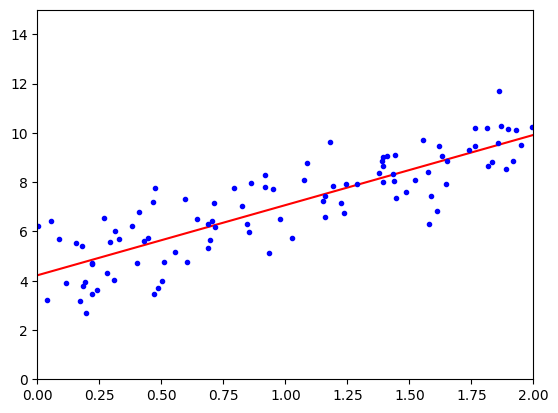

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.22023708]), array([[2.84767153]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.22023708],
       [9.91558015]])

Kelas **LinearRegression** didasarkan pada fungsi **scipy.linalg.lstsq()** (namanya merupakan singkatan dari "least squares"), yang sebenarnya bisa kita panggil secara langsung.


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.22023708],
       [2.84767153]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.22023708],
       [2.84767153]])

**Batch Gradient Descent**

Setelah kita memiliki vektor gradien, yang mengarah ke atas bukit, cukup bergerak ke arah sebaliknya untuk turun bukit. Ini berarti mengurangkan ∇θ MSE(θ) dari θ. Di sinilah *learning rate* η berperan: kalikan vektor gradien dengan η untuk menentukan ukuran langkah penurunan (lihat Persamaan 4-7).


In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

In [ ]:
theta = np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients

In [ ]:
theta

array([[4.22023708],
       [2.84767153]])

Hei, itu persis seperti yang ditemukan oleh Persamaan Normal! Gradient Descent bekerja dengan sempurna. Tapi bagaimana jika kita menggunakan *learning rate* (eta) yang berbeda? Gambar 4-8 menunjukkan 10 langkah pertama dari Gradient Descent dengan tiga *learning rate* yang berbeda (garis putus-putus menunjukkan titik awal).


**Stochastic Gradient Descent**

Oleh karena itu, keberacakan (randomness) memiliki sisi baik dan buruk: ia membantu keluar dari titik optimum lokal, tetapi juga membuat algoritma tidak pernah benar-benar menetap di titik minimum. Salah satu solusi dari dilema ini adalah dengan secara bertahap mengurangi *learning rate*. Langkah awalnya besar (yang membantu mempercepat proses dan keluar dari minimum lokal), lalu semakin kecil, memungkinkan algoritma untuk menetap di titik minimum global. Proses ini mirip dengan *simulated annealing*, sebuah algoritma yang terinspirasi dari proses metalurgi yang disebut *annealing*, di mana logam cair didinginkan secara perlahan.

Fungsi yang menentukan *learning rate* pada setiap iterasi disebut *learning schedule*. Jika *learning rate* dikurangi terlalu cepat, kita mungkin terjebak di minimum lokal, atau bahkan berhenti di tengah jalan sebelum mencapai minimum. Namun jika *learning rate* dikurangi terlalu lambat, kita bisa terus melompat-lompat di sekitar minimum untuk waktu yang lama dan berakhir pada solusi yang tidak optimal jika pelatihan dihentikan terlalu cepat.

Kode berikut mengimplementasikan **Stochastic Gradient Descent** dengan *learning schedule* yang sederhana:


In [ ]:
 n_epochs = 50
 t0, t1 = 5, 50

In [ ]:
def learning_schedule(t):
 return t0 / (t + t1)

Secara konvensi, kita melakukan iterasi dalam putaran sebanyak *m* iterasi; setiap putaran disebut satu *epoch*. Sementara kode Batch Gradient Descent melakukan iterasi sebanyak 1.000 kali melalui seluruh set pelatihan, kode ini hanya melewati set pelatihan sebanyak 50 kali dan sudah mencapai solusi yang cukup baik.

In [ ]:
 theta = np.random.randn(2,1)

In [ ]:
 for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.26034717],
       [2.78860082]])

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.18246145]), array([2.79055782]))

**Polynomial Regression**

Bagaimana jika data kita lebih kompleks daripada sebuah garis lurus? Yang mengejutkan, kita tetap bisa menggunakan model linier untuk menyesuaikan data nonlinier. Cara sederhana untuk melakukannya adalah dengan menambahkan pangkat dari setiap fitur sebagai fitur baru, lalu melatih model linier pada himpunan fitur yang telah diperluas ini. Teknik ini disebut **Regresi Polinomial**.

Mari kita lihat sebuah contoh. Pertama, kita akan menghasilkan data nonlinier berdasarkan sebuah persamaan kuadrat sederhana.

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.70579029])

Sekarang, `X_poly` berisi fitur asli dari `X` ditambah kuadrat dari fitur tersebut. Sekarang kita bisa melatih model `LinearRegression` pada data pelatihan yang telah diperluas ini.


In [ ]:
X_poly[0]

array([-1.70579029,  2.9097205 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85512039]), array([[1.0860773, 0.5075637]]))

In [ ]:
 def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

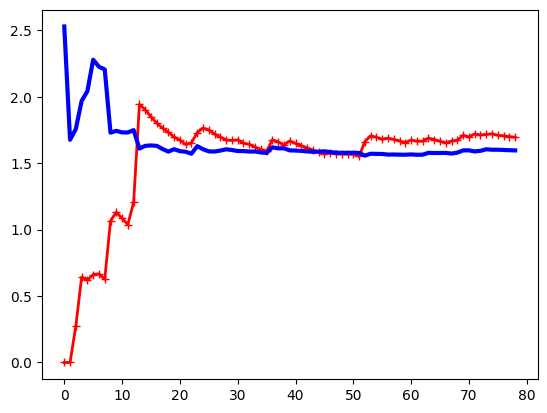

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

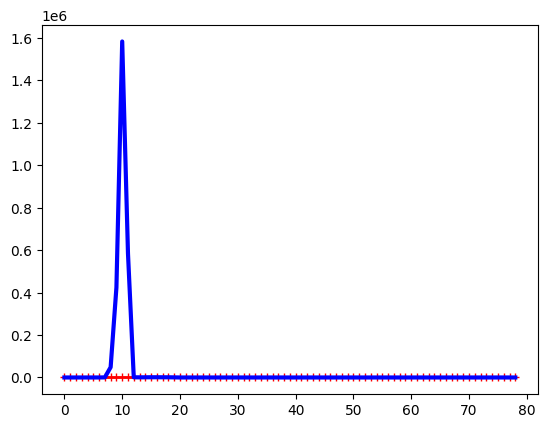

In [ ]:
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)

**Regularized Linear Models**


Ridge Regression

Berikut adalah cara melakukan **Ridge Regression** dengan Scikit-Learn menggunakan solusi bentuk tertutup (varian dari Persamaan 4-9 yang menggunakan teknik faktorisasi matriks oleh André-Louis Cholesky):

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.88821411])

Dan berikut adalah cara melakukan Ridge Regression menggunakan **Stochastic Gradient Descent**:

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.86993235])

**Lasso Regression**

**Least Absolute Shrinkage and Selection Operator Regression** (biasanya disebut **Lasso Regression**) adalah versi regresi linier yang juga menggunakan regularisasi: sama seperti **Ridge Regression**, Lasso menambahkan istilah regularisasi ke dalam fungsi biaya, tetapi menggunakan **norma ℓ1** dari vektor bobot, bukan setengah kuadrat dari norma ℓ2.

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.83888554])

**Elastic Net**

**Elastic Net** adalah titik tengah antara **Ridge Regression** dan **Lasso Regression**. Istilah regularisasinya merupakan campuran sederhana dari istilah regularisasi Ridge dan Lasso, dan kita dapat mengatur rasio campurannya, **r**. Ketika **r = 0**, Elastic Net setara dengan Ridge Regression, dan ketika **r = 1**, ia setara dengan Lasso Regression.

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.83781953])

**Early Stopping**

Cara yang sangat berbeda untuk melakukan regularisasi pada algoritma pembelajaran iteratif seperti Gradient Descent adalah dengan menghentikan pelatihan segera setelah error pada data validasi mencapai titik minimum. Teknik ini disebut **early stopping**. Gambar 4-20 menunjukkan model yang kompleks (dalam hal ini, model Regresi Polinomial dengan derajat tinggi) yang dilatih menggunakan Batch Gradient Descent. Seiring berjalannya *epoch*, algoritma terus belajar, dan kesalahan prediksi (RMSE) pada data pelatihan menurun, begitu juga kesalahan pada data validasi.

Namun, setelah beberapa waktu, kesalahan pada data validasi berhenti menurun dan mulai meningkat kembali. Ini menunjukkan bahwa model mulai mengalami **overfitting** terhadap data pelatihan. Dengan **early stopping**, kita cukup menghentikan pelatihan segera setelah kesalahan validasi mencapai titik terendah. Ini adalah teknik regularisasi yang sangat sederhana dan efisien, hingga Geoffrey Hinton menyebutnya sebagai *“makan siang gratis yang indah”*.

In [ ]:
# prepare the data
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
 sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
 y_val_predict = sgd_reg.predict(X_val_poly_scaled)
 val_error = mean_squared_error(y_val, y_val_predict)
 if val_error < minimum_val_error:
  minimum_val_error = val_error
  best_epoch = epoch
  best_model = clone(sgd_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Decision Boundaries**

Mari kita gunakan dataset iris untuk mengilustrasikan **Logistic Regression**. Ini adalah dataset terkenal yang berisi panjang dan lebar sepal serta petal dari 150 bunga iris dari tiga spesies berbeda: *Iris setosa*, *Iris versicolor*, dan *Iris virginica*.

Kita akan mencoba membangun sebuah classifier untuk mendeteksi jenis *Iris virginica* hanya berdasarkan fitur **lebar petal**. Pertama, mari kita muat datanya:

In [ ]:
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

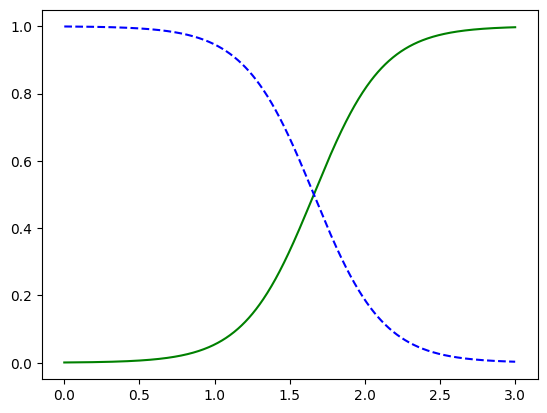

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

Lebar petal bunga *Iris virginica* (diwakili oleh simbol segitiga) berkisar antara 1,4 cm hingga 2,5 cm, sedangkan bunga iris lainnya (diwakili oleh simbol persegi) umumnya memiliki lebar petal yang lebih kecil, yaitu antara 0,1 cm hingga 1,8 cm. Perhatikan bahwa terdapat sedikit tumpang tindih. Pada lebar sekitar di atas 2 cm, classifier sangat yakin bahwa bunga tersebut adalah *Iris virginica* (menghasilkan probabilitas tinggi untuk kelas tersebut), sedangkan di bawah 1 cm classifier sangat yakin bahwa itu **bukan** *Iris virginica* (probabilitas tinggi untuk kelas "Bukan Iris virginica"). Di antara rentang tersebut, classifier merasa tidak yakin. Namun, jika kita memintanya untuk memprediksi kelas (menggunakan metode `predict()` alih-alih `predict_proba()`), ia akan mengembalikan kelas dengan probabilitas tertinggi. Oleh karena itu, terdapat batas keputusan (decision boundary) di sekitar 1,6 cm, di mana kedua probabilitas sama-sama 50%: jika lebar petal lebih besar dari 1,6 cm, classifier akan memprediksi bunga tersebut sebagai *Iris virginica*, dan jika lebih kecil maka diprediksi bukan (meskipun dengan tingkat keyakinan yang rendah).


In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**Softmax Regression**

Mari kita gunakan **Softmax Regression** untuk mengklasifikasikan bunga iris ke dalam tiga kelas. Secara default, `LogisticRegression` dari Scikit-Learn menggunakan strategi **one-versus-the-rest** saat dilatih pada lebih dari dua kelas, tetapi kita bisa mengubahnya menjadi **Softmax Regression** dengan menyetel hyperparameter `multi_class` ke `"multinomial"`.

Kita juga harus menentukan *solver* yang mendukung Softmax Regression, seperti `"lbfgs"` (lihat dokumentasi Scikit-Learn untuk detail lebih lanjut). Selain itu, secara default model ini menggunakan regularisasi ℓ2, yang bisa dikontrol melalui hyperparameter `C`:


In [ ]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

Jadi, lain kali jika kita menemukan bunga iris dengan petal sepanjang 5 cm dan lebar 2 cm, kita bisa meminta model untuk memberi tahu jenis iris tersebut, dan model akan menjawab *Iris virginica* (kelas 2) dengan probabilitas 94,2% (atau *Iris versicolor* dengan probabilitas 5,8%).

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])